<a href="https://colab.research.google.com/github/jannajabel/ECE160-Waste_Classification/blob/main/loaded_model_with_testing.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import random
import math
import os
import cv2 as cv
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split

In [2]:
!git clone https://github.com/jannajabel/ECE160-Waste_Classification.git

Cloning into 'ECE160-Waste_Classification'...
remote: Enumerating objects: 5496, done.
remote: Counting objects: 100% (31/31), done.
remote: Compressing objects: 100% (25/25), done.
remote: Total 5496 (delta 18), reused 11 (delta 6), pack-reused 5465
Receiving objects: 100% (5496/5496), 211.08 MiB | 37.70 MiB/s, done.
Resolving deltas: 100% (270/270), done.
Checking out files: 100% (5080/5080), done.


In [3]:
#LOAD DATA
DIR = "/content/ECE160-Waste_Classification/Dataset"
train_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, validation_split=0.1, subset="training", seed=42, batch_size=128, smart_resize=True, image_size=(256, 256))
test_dataset = tf.keras.preprocessing.image_dataset_from_directory(DIR, validation_split=0.1, subset="validation", seed=42, batch_size=128, smart_resize=True, image_size=(256, 256))

classes = train_dataset.class_names
numClasses = len(train_dataset.class_names)
print(classes)

AUTOTUNE = tf.data.AUTOTUNE

train_dataset = train_dataset.prefetch(buffer_size=AUTOTUNE)
test_dataset = test_dataset.prefetch(buffer_size=AUTOTUNE)

Found 5077 files belonging to 10 classes.
Using 4570 files for training.
Found 5077 files belonging to 10 classes.
Using 507 files for validation.
['Aluminum', 'Cardboard', 'Carton', 'Glass', 'Organic Waste', 'Other Plastics', 'Paper', 'Plastic', 'Textiles', 'Wood']


In [4]:
new_model = tf.keras.models.load_model("/content/drive/MyDrive/Colab Notebooks/version_three.h5")
new_model.evaluate(test_dataset)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/util/dispatch.py:1082: UserWarning: "`sparse_categorical_crossentropy` received `from_logits=True`, but the `output` argument was produced by a sigmoid or softmax activation and thus does not represent logits. Was this intended?"
  return dispatch_target(*args, **kwargs)


4/4 [==============================] - 19s 4s/step - loss: 2.2741 - accuracy: 0.9093


[2.2741401195526123, 0.9092702269554138]

[3.4839031e-03 1.4334917e-02 4.3126773e-03 1.3184155e-03 1.4833646e-02
 3.7271781e-03 2.4265740e-02 1.8395869e-02 2.9592341e-02 9.9885735e+01] 
 ['Aluminum', 'Cardboard', 'Carton', 'Glass', 'Organic Waste', 'Other Plastics', 'Paper', 'Plastic', 'Textiles', 'Wood']
Prediction:  Wood 99.88573789596558%


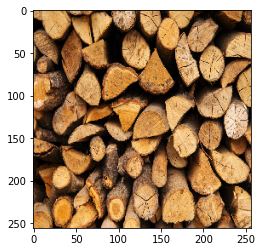

In [6]:
import requests

img_data = requests.get("https://images.ctfassets.net/cnu0m8re1exe/60KbU1w7lmUCJeXZpdcW1x/ea455b58988d75412f56d4068ba208fc/shutterstock_347288675.jpg").content
with open('img.jpg', 'wb') as handler:
    handler.write(img_data)

path = "/content/img.jpg"

img = tf.keras.preprocessing.image.load_img(path, target_size=(256, 256))
img_array = tf.keras.preprocessing.image.img_to_array(img)
img_array = tf.expand_dims(img_array, 0) 

predictions = new_model.predict(img_array)

plt.imshow(img)
print(predictions[0]*100, "\n", classes)
print("Prediction: ", classes[np.argmax(predictions)], f"{predictions[0][np.argmax(predictions)]*100}%")